In [3]:
#coding=utf-8
# ############### 定义 ###############
class Goods:
    """python3中默认继承object类
        以python2、3执行此程序的结果不同，因为只有在python3中才有@xxx.setter  @xxx.deleter
    """
    @property
    def price(self):
        # print('@property')
        return 5

    # @price.setter
    # def price(self, value):
    #     print('@price.setter')

    # @price.deleter
    # def price(self):
    #     print('@price.deleter')

# ############### 调用 ###############
obj = Goods()
# obj.price          # 自动执行 @property 修饰的 price 方法，并获取方法的返回值
# obj.price = 123    # 自动执行 @price.setter 修饰的 price 方法，并将  123 赋值给方法的参数
# del obj.price      # 自动执行 @price.deleter 修饰的 price 方法


In [4]:
obj.price

5

In [5]:
obj.price=9

AttributeError: can't set attribute

In [1]:
#!/usr/bin/env python3
# -*- coding: UTF-8 -*-

import time
import threading


class MyThread(threading.Thread):
    def run(self):
        for i in range(5):
            print('thread {}, @number: {}'.format(self.name, i))
            time.sleep(1)


def main():
    print("Start main threading")

    # 创建三个线程
    threads = [MyThread() for i in range(3)]
    # 启动三个线程
    for t in threads:
        t.start()

    print("End Main threading")
    # print(threads)

if __name__ == '__main__':
    main()


Start main threading
thread Thread-3, @number: 0
thread Thread-4, @number: 0
thread Thread-5, @number: 0
End Main threading
thread Thread-5, @number: 1
thread Thread-4, @number: 1
thread Thread-3, @number: 1
thread Thread-3, @number: 2thread Thread-4, @number: 2
thread Thread-5, @number: 2

thread Thread-5, @number: 3thread Thread-4, @number: 3

thread Thread-3, @number: 3
thread Thread-3, @number: 4
thread Thread-4, @number: 4
thread Thread-5, @number: 4


In [2]:
#!/usr/bin/env python3
# -*- coding: UTF-8 -*-

import threading, time


class Consumer(threading.Thread):
    def __init__(self, cond, name):
        # 初始化
        super(Consumer, self).__init__()
        self.cond = cond
        self.name = name

    def run(self):
        # 确保先运行Seeker中的方法
        time.sleep(1)
        self.cond.acquire()
        print(self.name + ': 我这两件商品一起买，可以便宜点吗')
        self.cond.notify()
        self.cond.wait()
        print(self.name + ': 我已经提交订单了，你修改下价格')
        self.cond.notify()
        self.cond.wait()
        print(self.name + ': 收到，我支付成功了')
        self.cond.notify()
        self.cond.release()
        print(self.name + ': 等待收货')


class Producer(threading.Thread):
    def __init__(self, cond, name):
        super(Producer, self).__init__()
        self.cond = cond
        self.name = name

    def run(self):
        self.cond.acquire()
        # 释放对琐的占用，同时线程挂起在这里，直到被 notify 并重新占有琐。
        self.cond.wait()
        print(self.name + ': 可以的，你提交订单吧')
        self.cond.notify()
        self.cond.wait()
        print(self.name + ': 好了，已经修改了')
        self.cond.notify()
        self.cond.wait()
        print(self.name + ': 嗯，收款成功，马上给你发货')
        self.cond.release()
        print(self.name + ': 发货商品')


cond = threading.Condition()
consumer = Consumer(cond, '买家（两点水）')
producer = Producer(cond, '卖家（三点水）')
consumer.start()
producer.start()


买家（两点水）: 我这两件商品一起买，可以便宜点吗
卖家（三点水）: 可以的，你提交订单吧
买家（两点水）: 我已经提交订单了，你修改下价格
卖家（三点水）: 好了，已经修改了
买家（两点水）: 收到，我支付成功了
买家（两点水）: 等待收货
卖家（三点水）: 嗯，收款成功，马上给你发货
卖家（三点水）: 发货商品


In [1]:
import time
import multiprocessing

def work():
    # 子进程会工作2秒钟
    for i in range(10):
        print("工作中...")
        time.sleep(0.2)

if __name__ == "__main__":
    work_process = multiprocessing.Process(target=work)
    work_process.start()
    work_process.daemon = True # 设置子进程 守护 主进程

    # 主进程睡眠1秒
    time.sleep(1)
    print("主进程执行完了...")


AssertionError: process has already started

In [3]:
# 1.导入进程包
import time
import threading


# 唱歌
def sing():
    for i in range(3):
        print("唱歌...")
        time.sleep(0.5) # 延迟0.5秒


# 跳舞
def dance():
    for i in range(3):
        print("跳舞...")
        time.sleep(0.5)

if __name__ == "__main__":
    sing()
    dance()


唱歌...
唱歌...
唱歌...
跳舞...
跳舞...
跳舞...


In [5]:
# 1.导入进程包
import time
import threading


# 唱歌
def sing():
    for i in range(3):
        print("唱歌...")
        time.sleep(0.5) # 延迟0.5秒


# 跳舞
def dance():
    for i in range(3):
        print("跳舞...")
        time.sleep(0.5)

if __name__ == "__main__":
    # 2.使用进程类创建进程对象
    sing_thread = threading.Thread(target=sing)
    dance_thread = threading.Thread(target=dance)

    # 3.使用进程对象启动进程执行指定任务
    sing_thread.start()
    dance_thread.start()


唱歌...
跳舞...
唱歌...跳舞...

跳舞...唱歌...



In [1]:
import os

print('Process (%s) start...' % os.getpid())
# Only works on Unix/Linux/Mac:
pid = os.fork()
if pid == 0:
    print('I am child process (%s) and my parent is %s.' % (os.getpid(), os.getppid()))
else:
    print('I (%s) just created a child process (%s).' % (os.getpid(), pid))

Process (14424) start...


AttributeError: module 'os' has no attribute 'fork'

In [1]:
from multiprocessing import Pool
import os, time, random

def long_time_task(name):
    print('Run task %s (%s)...' % (name, os.getpid()))
    start = time.time()
    time.sleep(random.random() * 3)
    end = time.time()
    print('Task %s runs %0.2f seconds.' % (name, (end - start)))

if __name__=='__main__':
    print('Parent process %s.' % os.getpid())
    p = Pool(4)
    for i in range(5):
        p.apply_async(long_time_task, args=(i,))
    print('Waiting for all subprocesses done...')
    p.close()
    p.join()
    print('All subprocesses done.')

Parent process 24444.
Waiting for all subprocesses done...


In [2]:
import time
import threading


def loop():
    print(f'thread {threading.current_thread().name} is running')
    n = 0
    while n < 5:
        n += 1
        print(f'thread {threading.current_thread().name} >>> {n}')
        time.sleep(1)
    print(f'thread {threading.current_thread().name} ended')


print(f'thread {threading.current_thread().name} is running...')
t = threading.Thread(target=loop, name='LoopThread')
t.start()
t.join()
print(f'thread {threading.current_thread().name} ended.')


thread MainThread is running...
thread LoopThread is running
thread LoopThread >>> 1
thread MainThread ended.


thread LoopThread >>> 2
thread LoopThread >>> 3
thread LoopThread >>> 4
thread LoopThread >>> 5
thread LoopThread ended


In [7]:
import time, threading

# 假定这是你的银行存款:
balance = 0

def change_it(n):
    # 先存后取，结果应该为0:
    global balance
    balance = balance + n
    balance = balance - n

def run_thread(n):
    for i in range(2000):
        change_it(n)

t1 = threading.Thread(target=run_thread, args=(5,))
t2 = threading.Thread(target=run_thread, args=(8,))
t1.start()
t2.start()
t1.join()
t2.join()
print(balance)

0


In [1]:
# task_master.py

import random, time, queue
from multiprocessing.managers import BaseManager

# 发送任务的队列:
task_queue = queue.Queue()
# 接收结果的队列:
result_queue = queue.Queue()

# 从BaseManager继承的QueueManager:
class QueueManager(BaseManager):
    pass

# 把两个Queue都注册到网络上, callable参数关联了Queue对象:
QueueManager.register('get_task_queue', callable=lambda: task_queue)
QueueManager.register('get_result_queue', callable=lambda: result_queue)
# 绑定端口5000, 设置验证码'abc':
manager = QueueManager(address=('', 5000), authkey=b'abc')
# 启动Queue:
manager.start()
# 获得通过网络访问的Queue对象:
task = manager.get_task_queue()
result = manager.get_result_queue()
# 放几个任务进去:
for i in range(10):
    n = random.randint(0, 10000)
    print('Put task %d...' % n)
    task.put(n)
# 从result队列读取结果:
print('Try get results...')
for i in range(10):
    r = result.get(timeout=10)
    print('Result: %s' % r)
# 关闭:
manager.shutdown()
print('master exit.')

PicklingError: Can't pickle <function <lambda> at 0x0000018D7BAACA60>: attribute lookup <lambda> on __main__ failed

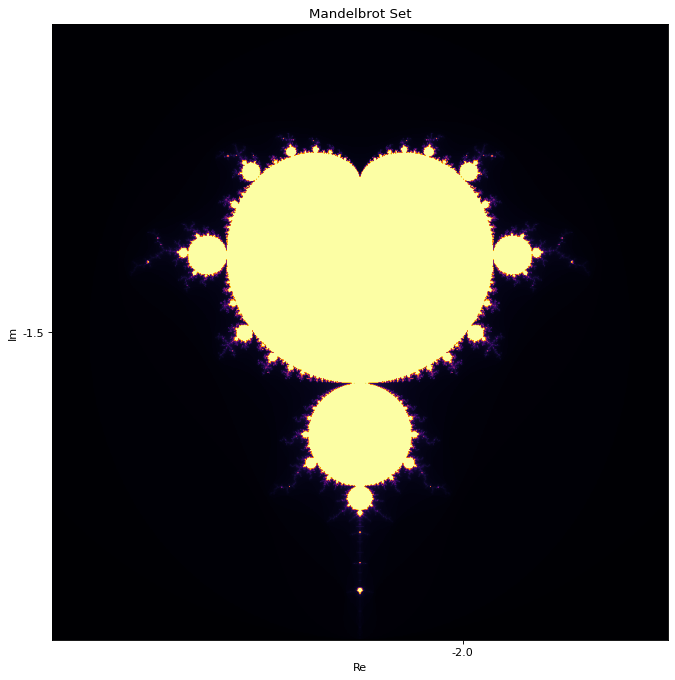

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z * z + c
        n += 1
    return n

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    return (r1, r2, np.array([[mandelbrot(complex(r, i), max_iter) for r in r1] for i in r2]))

def plot_mandelbrot(xmin, xmax, ymin, ymax, width=10, height=10, max_iter=256, cmap='twilight'):
    dpi = 80
    img_width = dpi * width
    img_height = dpi * height
    x, y, z = mandelbrot_set(xmin, xmax, ymin, ymax, img_width, img_height, max_iter)
    
    plt.figure(figsize=(width, height), dpi=dpi)
    ticks = np.arange(0, img_width, 3 * dpi)
    x_ticks = xmin + (xmax - xmin) * ticks / img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax - ymin) * ticks / img_height
    plt.yticks(ticks, y_ticks)
    plt.xlabel("Re")
    plt.ylabel("Im")
    plt.title("Mandelbrot Set")
    plt.imshow(z.T, origin='lower', cmap=cmap, extent=[xmin, xmax, ymin, ymax])
    plt.show()

plot_mandelbrot(-2.0, 1.0, -1.5, 1.5, cmap='inferno')


In [10]:
import torch
x= torch.arange(12).reshape(12,1)
y=torch.arange(12).reshape(1,12)
a=x+y
a

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
        [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
        [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
        [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
        [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
        [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
        [ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
        [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
        [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]])

In [11]:
a[:,:]=12
a

tensor([[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
        [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
        [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
        [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
        [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
        [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
        [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
        [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
        [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
        [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
        [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
        [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]])

In [14]:
b=torch.tensor([3.5,5])
int(b),float(b)

ValueError: only one element tensors can be converted to Python scalars

In [17]:
import torch
x=torch.tensor([1,2,3,4])
y=torch.tensor([5,6,7,8])
z= id(y)
y+=x
print(z)
print(id(y))
print(z==id(y))

2101701645792
2101701645792
True


In [21]:
a=torch.norm()
a

AttributeError: 'int' object has no attribute 'dim'

In [25]:
import torch
a=torch.arange(12)
print(id(a))
b=a.reshape(3,4)
print(id(b))
print(id(b)==id(a))
b[:]=25
a

2101547756656
2101701645872
False


tensor([25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25])

In [29]:
a=torch.ones(4,3)
b=torch.ones(3,5)
torch.mm(a,b)

tensor([[3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3.]])

In [1]:
import torch
x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6,7])
a,b=torch.meshgrid(x,y)

F:\Env\anaconda\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [2]:
a,b

(tensor([[1, 1, 1, 1],
         [2, 2, 2, 2],
         [3, 3, 3, 3]]),
 tensor([[4, 5, 6, 7],
         [4, 5, 6, 7],
         [4, 5, 6, 7]]))

In [ ]:
import torch
import torchvision

X = torch.arange(16.).reshape(1, 1, 4, 4)
rois = torch.Tensor([[0, 0, 0, 20, 20], [0, 0, 10, 30, 30]])
torchvision.ops.roi_pool(X, rois, output_size=(2, 2), spatial_scale=0.1)